In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pylot as plt


ModuleNotFoundError: No module named 'matplotlib.pylot'

In [16]:
import matplotlib.pyplot as plt

In [17]:
mnist = tf.keras.datasets.mnist

In [18]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [19]:
x_train, x_test = x_train / 255.0, x_test /255.0

In [27]:
print("shape of x_train:" , x_train.shape)
print("shape of x_test:" , x_test.shape)

shape of x_train: (60000, 28, 28)
shape of x_test: (10000, 28, 28)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from socket import socket
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 3
random_state = 0


X= x_train / 255.0
Y= x_test /255.0



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=random_state
)

dim = len(X[0])
n_classes = len(np.unique(y))


pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))


lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))


nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state),
)


knn = KNeighborsClassifier(n_neighbors=n_neighbors)


dim_reduction_methods = [("PCA", pca)]


for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    

    
    model.fit(X_train, y_train)

    
    knn.fit(model.transform(X_train), y_train)

   
    acc_knn = knn.score(model.transform(X_test), y_test)

    
    X_embedded = model.transform(X)

    
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [60000, 10000]

In [28]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2974 - accuracy: 0.9130 - val_loss: 0.1409 - val_accuracy: 0.9592
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1426 - accuracy: 0.9573 - val_loss: 0.1010 - val_accuracy: 0.9709
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1062 - accuracy: 0.9678 - val_loss: 0.0881 - val_accuracy: 0.9712
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0864 - accuracy: 0.9731 - val_loss: 0.0900 - val_accuracy: 0.9721
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0726 - accuracy: 0.9779 - val_loss: 0.0777 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0664 - accuracy: 0.9790 - val_loss: 0.0738 - val_accuracy: 0.9760
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0576 - accuracy: 0.9814 - val_loss: 0.0788 - val_accuracy:

In [7]:
from sklearn.cluster import SpectralClustering
import numpy as np
X = x_train
clustering = SpectralClustering(n_clusters=2,
        assign_labels='discretize',
        random_state=0).fit(X)

NameError: name 'x_train' is not defined

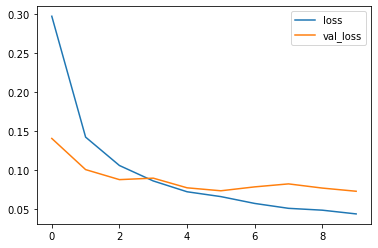

In [32]:
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()

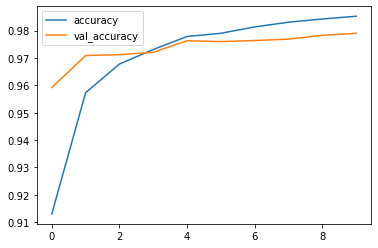

In [33]:
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

In [34]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9790
[0.07323545217514038, 0.9789999723434448]


Normalized Confusion Matrix
[[9.89795918e-01 1.02040816e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.02040816e-03 2.04081633e-03 1.02040816e-03
  3.06122449e-03 2.04081633e-03]
 [0.00000000e+00 9.92070485e-01 2.64317181e-03 8.81057269e-04
  0.00000000e+00 0.00000000e+00 1.76211454e-03 0.00000000e+00
  2.64317181e-03 0.00000000e+00]
 [2.90697674e-03 9.68992248e-04 9.70930233e-01 1.93798450e-03
  2.90697674e-03 0.00000000e+00 1.93798450e-03 1.16279070e-02
  6.78294574e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.97029703e-03 9.75247525e-01
  0.00000000e+00 3.96039604e-03 0.00000000e+00 5.94059406e-03
  3.96039604e-03 7.92079208e-03]
 [0.00000000e+00 0.00000000e+00 1.01832994e-03 0.00000000e+00
  9.71486762e-01 0.00000000e+00 5.09164969e-03 1.01832994e-03
  0.00000000e+00 2.13849287e-02]
 [3.36322870e-03 0.00000000e+00 0.00000000e+00 5.60538117e-03
  2.24215247e-03 9.76457399e-01 3.36322870e-03 1.12107623e-03
  4.48430493e-03 3.36322870e-03]
 [5.21920668e-03 3.13152401e-0

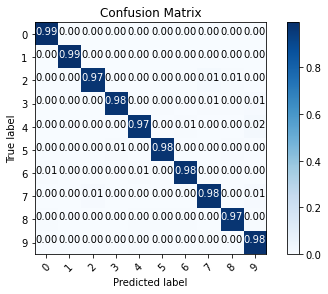

In [66]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = True,
                          title="Confusion Matrix",
                          cmap = plt.cm.Blues):
  
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  
  else:
    print("Confusion matrix with normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

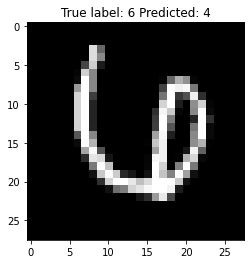

In [58]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

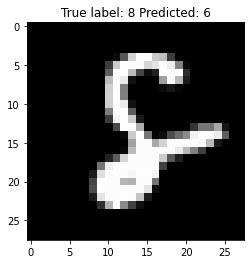

In [59]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

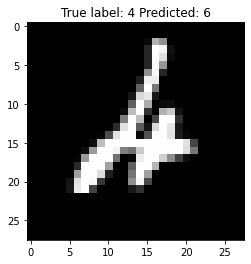

In [60]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

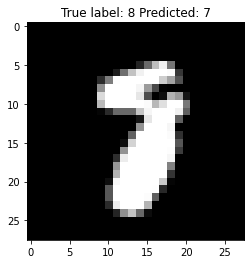

In [61]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

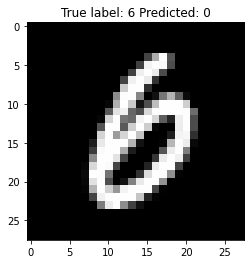

In [62]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));